# *Evolution de la délinquance en France*

**NOM**    PLUSQUELLEC <br>
**PRÉNOM** *Valérie*


####
## Introduction

Depuis 1972, la police et la gendarmerie enregistrent chaque mois les crimes et délits signalés à la justice, en les classant dans 18 catégories selon leur nature, appelées indicateurs. Ce système permet de suivre précisément l’évolution de la criminalité. Depuis 2014, un service spécialisé veille à la fiabilité et à la diffusion de ces données.

Cette étude propose d'observer la délinquance en France métropolitaine, en suivant quelques pistes de reflexion : 
- établir un classement des départements en France métropolitaine basé sur l'ensemble des faits relevés en 2024 ;
- pour les cinq départements les plus concernés par la criminalité en 2024, visualiser la répartition de chaque catégorie de délits et crimes ;
- pour la région la plus exposée à la délinquance en 2024, mettre en évidence les disparités entre les départements ;
- pour le département le plus sinistré en 2024, observer l'évolution de la catégorie de délits la plus présente durant les neufs dernières années.

####
## I. Présentation du jeu de données 

Le site data.gouv.fr est la plateforme qui consigne les données publiques françaises. C'est un véritable catalogue référençant des données fiables sur différentssujets, produites par l’administration et la société civile.

C'est sur ce site que sont mises à disposition les bases statistiques communale, départementale et régionale de la délinquance enregistrée par la police et la gendarmerie nationales, disponibles [ici](https://www.data.gouv.fr/datasets/bases-statistiques-communale-departementale-et-regionale-de-la-delinquance-enregistree-par-la-police-et-la-gendarmerie-nationales/).

Le jeu de données choisi, dont la dernière mise à jour date de juillet 2025, rassemble à l’échelle départementale, les principaux indicateurs des crimes et délits enregistrés par la police et la gendarmerie depuis 2016.
Il contient :
- Le nombre de faits constatés pour différentes catégories d’infractions 
- Des informations géographiques (codes des départements et des régions)
- La population résidente correspondante
- Des précisions sur la nature des délits et crimes.

####
### I.1. Extraction du jeu de données


In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Extraction du jeu de données
delits = pd.read_csv('donnee-dep-data.gouv-2024-geographie2025-produit-le2025-06-04.csv', sep=";")
delits

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
0,01,84,2016,Homicides,Victime,5,"0,0078318",638425,2016,308491,2016
1,02,32,2016,Homicides,Victime,10,"0,0186520",536136,2016,264180,2016
2,03,84,2016,Homicides,Victime,4,"0,0117861",339384,2016,206980,2016
3,04,93,2016,Homicides,Victime,2,"0,0123028",162565,2016,126760,2016
4,05,93,2016,Homicides,Victime,0,"0,0000000",141107,2016,134647,2016
...,...,...,...,...,...,...,...,...,...,...,...
16357,971,1,2024,Escroqueries et fraudes aux moyens de paiement,Victime,1544,"4,0253514",383569,2022,235968,2021
16358,972,2,2024,Escroqueries et fraudes aux moyens de paiement,Victime,1518,"4,2047648",361019,2022,218565,2021
16359,973,3,2024,Escroqueries et fraudes aux moyens de paiement,Victime,693,"2,4030626",288382,2022,98634,2021
16360,974,4,2024,Escroqueries et fraudes aux moyens de paiement,Victime,2741,"3,1100088",881348,2022,395388,2021


Ce jeu de données contient 16 362 lignes et 11 colonnes.

####
### I.2. Exploration et traitement du jeu de données

#### I.2.a. Taille du jeu de données

In [3]:
delits.columns

Index(['Code_departement', 'Code_region', 'annee', 'indicateur',
       'unite_de_compte', 'nombre', 'taux_pour_mille', 'insee_pop',
       'insee_pop_millesime', 'insee_log', 'insee_log_millesime'],
      dtype='object')

In [4]:
delits.index

RangeIndex(start=0, stop=16362, step=1)

Les 16 362 lignes correspondent au 101 départements Français observés sur 9 ans pour les 18 indicateurs de délits et crimes. Voici la liste des indicateurs observés :

In [5]:
delits['indicateur'].value_counts()

Homicides                                         909
Tentatives d'homicide                             909
Trafic de stupéfiants                             909
Usage de stupéfiants (hors AFD)                   909
Usage de stupéfiants (AFD)                        909
Usage de stupéfiants                              909
Destructions et dégradations volontaires          909
Vols d'accessoires sur véhicules                  909
Vols dans les véhicules                           909
Vols de véhicule                                  909
Cambriolages de logement                          909
Vols sans violence contre des personnes           909
Vols violents sans arme                           909
Vols avec armes                                   909
Violences sexuelles                               909
Violences physiques hors cadre familial           909
Violences physiques intrafamiliales               909
Escroqueries et fraudes aux moyens de paiement    909
Name: indicateur, dtype: int

####
#### I.2.b. Valeurs manquantes


On constate ci-dessous qu'aucune valeur n'est manquante :

In [6]:
delits.isnull().sum()

Code_departement       0
Code_region            0
annee                  0
indicateur             0
unite_de_compte        0
nombre                 0
taux_pour_mille        0
insee_pop              0
insee_pop_millesime    0
insee_log              0
insee_log_millesime    0
dtype: int64

####
#### I.2.c. Types des valeurs
On remarque ci-dessous que les valeurs contenues dans la colonne 'taux_pour_mille' ne sont pas reconnues comme étant des nombres. Une modification de leur type est donc necessaire.

In [7]:
delits.dtypes

Code_departement       object
Code_region             int64
annee                   int64
indicateur             object
unite_de_compte        object
nombre                  int64
taux_pour_mille        object
insee_pop               int64
insee_pop_millesime     int64
insee_log               int64
insee_log_millesime     int64
dtype: object

In [8]:
# Modification pour le taux pour mille
delits['taux_pour_mille'] = delits['taux_pour_mille'].str.replace(",", ".")
delits['taux_pour_mille'] = delits['taux_pour_mille'].astype(float)  
# Vérification et synthèse statistique des valeurs numériques du jeu de données
delits.describe(include='all')

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
count,16362,16362.000000,16362.000000,16362,16362,16362.000000,16362.000000,1.636200e+04,16362.000000,1.636200e+04,16362.000000
unique,101,NaN,NaN,18,5,NaN,NaN,NaN,NaN,NaN,NaN
top,01,NaN,NaN,Homicides,Victime,NaN,NaN,NaN,NaN,NaN,NaN
freq,162,NaN,NaN,909,5454,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,52.653465,2020.000000,NaN,NaN,1794.079086,2.428904,6.675110e+05,2019.640264,3.633068e+05,2019.310231
std,NaN,28.196232,2.582068,NaN,NaN,4238.287726,2.882800,5.115253e+05,2.165747,2.603788e+05,1.831367
min,NaN,1.000000,2016.000000,NaN,NaN,0.000000,0.000000,7.642200e+04,2016.000000,6.039500e+04,2016.000000
25%,NaN,27.000000,2018.000000,NaN,NaN,157.000000,0.430260,2.833720e+05,2018.000000,1.651150e+05,2018.000000
50%,NaN,52.000000,2020.000000,NaN,NaN,690.000000,1.644364,5.293740e+05,2020.000000,2.951090e+05,2020.000000
75%,NaN,76.000000,2022.000000,NaN,NaN,1861.750000,3.337708,8.495830e+05,2022.000000,4.816820e+05,2021.000000


Sur le tableau descriptif ci-dessus, les valeurs statistiques (moyenne, écart-type, quartiles...) sont renseignées pour les variables reconnues comme étant quantitatives.
La variable taux pour mille a bien été convertie en variable quantitative.

####
#### I.2.d. Retrait des départements non métropolitains

D'après la liste des [codes régions](https://fr.wikipedia.org/wiki/R%C3%A9gion_fran%C3%A7aise), les départements des régions codés entre 1 et 6 ne sont pas en France métropole, et pourront être retirés du jeu de données. 

In [9]:
delits['Code_region'].value_counts()

76    2106
84    1944
75    1944
44    1620
27    1296
11    1296
93     972
24     972
52     810
28     810
32     810
53     648
94     324
1      162
2      162
3      162
4      162
6      162
Name: Code_region, dtype: int64

In [10]:
# Selection des lignes correspondants aux départements de la France métropolitaine.
mask = delits['Code_region'] > 6
delits_metropole = delits.loc[mask, :]
delits_metropole

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
0,01,84,2016,Homicides,Victime,5,0.007832,638425,2016,308491,2016
1,02,32,2016,Homicides,Victime,10,0.018652,536136,2016,264180,2016
2,03,84,2016,Homicides,Victime,4,0.011786,339384,2016,206980,2016
3,04,93,2016,Homicides,Victime,2,0.012303,162565,2016,126760,2016
4,05,93,2016,Homicides,Victime,0,0.000000,141107,2016,134647,2016
...,...,...,...,...,...,...,...,...,...,...,...
16352,91,11,2024,Escroqueries et fraudes aux moyens de paiement,Victime,8282,6.252708,1324546,2022,587710,2021
16353,92,11,2024,Escroqueries et fraudes aux moyens de paiement,Victime,13501,8.195164,1647435,2022,824372,2021
16354,93,11,2024,Escroqueries et fraudes aux moyens de paiement,Victime,9956,5.920112,1681725,2022,705282,2021
16355,94,11,2024,Escroqueries et fraudes aux moyens de paiement,Victime,9842,6.933276,1419531,2022,662168,2021


####
## II. Analyse du jeu de données
#####
### II.1. Classement des départements en France métropolitaine sur l'année 2024 ;

Dans cette partie, on souhaite établir un classement des départements sur l'ensemble des faits de délinquance relevés en 2024. Pour que la comparaison soit significative, elle se fera sur le taux de délinquance pour mille habitants.

In [11]:
# On conserve dans un premier temps les données sur 2024
mask2024 = delits_metropole['annee'] == 2024
metro2024 = delits_metropole.loc[mask2024,:]
# Puis on regroupe pour chaque département les taux pour mille sur les différents indicateurs
group2024 = metro2024.groupby('Code_departement')
classement_dept = group2024['taux_pour_mille'].sum().sort_values(ascending=False)
classement_dept

Code_departement
75    128.334519
13     91.645642
93     82.395333
69     76.642217
34     66.747914
         ...    
2B     32.630722
12     32.463483
50     32.065215
15     27.202266
48     26.940147
Name: taux_pour_mille, Length: 96, dtype: float64

In [12]:
type(classement_dept)

pandas.core.series.Series

On constate que l'on obtient une série que l'on va transformer en dataframe, plus simple à exploiter.

In [13]:
# Transformation en dataframe
classement_dept = pd.DataFrame({'Code_departement': classement_dept.index,'taux_pour_mille': classement_dept.values})
classement_dept

,Code_departement,taux_pour_mille
0,75,128.334519
1,13,91.645642
2,93,82.395333
3,69,76.642217
4,34,66.747914
...,...,...
91,2B,32.630722
92,12,32.463483
93,50,32.065215
94,15,27.202266


In [14]:
# Ajout d'une colonne pour le rang
classement_dept['rang'] = classement_dept.index + 1
classement_dept

,Code_departement,taux_pour_mille,rang
0,75,128.334519,1
1,13,91.645642,2
2,93,82.395333,3
3,69,76.642217,4
4,34,66.747914,5
...,...,...,...
91,2B,32.630722,92
92,12,32.463483,93
93,50,32.065215,94
94,15,27.202266,95


On a ainsi le classement des départements, avec leur rang, dans l'ordre décroissant du taux de délinquance. On peut déjà constater une grande différence entre le haut du classement et le bas du classement. En effet, il y a plus de 100 faits recensés pour mille habitants d'écart entre Paris(75) et Lozère(48).

Ci-dessous, on peut obtenir les informations du département à la n-ième place.

In [15]:
# Test : Trouver le département à la n-ieme place du classement.
n = 92
dept =  classement_dept.iloc[n-1,0]
taux =  classement_dept.iloc[n-1,1]
print(f"Le code du {n}-ième département le plus sinistré par les délits et les crimes est {dept} avec un taux pour mille d'environ {taux:.2f}.")


Le code du 92-ième département le plus sinistré par les délits et les crimes est 2B avec un taux pour mille d'environ 32.63.


####
### II.2 Répartition des catégories des délits dans les 5 premiers départements du classement en 2024

Une façon de visualiser la répartition des catégories de délits et crimes sur un ensemble, tout en comparant les départements, est de le faire avec des diagrammes en bâtons empilés. On peut aussi observer la répartitions des délits au sein de chaque département à l'aide de diagrammes circulaires. Quelques manipulations en amont sur les données vont être nécessaire : filtrer les données des 5 départements concernés, et les pivoter en largeur.


In [16]:
# Création de la liste des 5 premiers départements du classement
top5 = classement_dept.head(5)
liste_top5 = top5['Code_departement']

In [17]:
# Récupération des données sur 2024 des 5 départements obtenus
delits_top5 = metro2024.loc[metro2024['Code_departement'].isin(liste_top5),:]
delits_top5

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
820,13,93,2024,Homicides,Victime,63,0.030438,2069811,2022,1066675,2021
842,34,76,2024,Homicides,Victime,18,0.014786,1217331,2022,760879,2021
877,69,84,2024,Homicides,Victime,25,0.013103,1907982,2022,964037,2021
883,75,11,2024,Homicides,Victime,32,0.015139,2113705,2022,1396753,2021
901,93,11,2024,Homicides,Victime,42,0.024974,1681725,2022,705282,2021
...,...,...,...,...,...,...,...,...,...,...,...
16273,13,93,2024,Escroqueries et fraudes aux moyens de paiement,Victime,15053,7.272645,2069811,2022,1066675,2021
16295,34,76,2024,Escroqueries et fraudes aux moyens de paiement,Victime,8662,7.115567,1217331,2022,760879,2021
16330,69,84,2024,Escroqueries et fraudes aux moyens de paiement,Victime,15140,7.935085,1907982,2022,964037,2021
16336,75,11,2024,Escroqueries et fraudes aux moyens de paiement,Victime,24278,11.485993,2113705,2022,1396753,2021


Pour obtenir un diagramme en bâtons empilés, il faut que pour chaque département et pour chaque indicateur, on ait le taux pour mille habitants. Il faut pour celà faire pivoter les indicateurs dans les colonnes.

In [18]:
# Obtention du tableau des taux pour mille pour chaque catégorie
taux_top5 = delits_top5.pivot_table(index='Code_departement', columns='indicateur', values='taux_pour_mille')
taux_top5

indicateur,Cambriolages de logement,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiement,Homicides,Tentatives d'homicide,Trafic de stupéfiants,Usage de stupéfiants,Usage de stupéfiants (AFD),Usage de stupéfiants (hors AFD),Violences physiques hors cadre familial,Violences physiques intrafamiliales,Violences sexuelles,Vols avec armes,Vols d'accessoires sur véhicules,Vols dans les véhicules,Vols de véhicule,Vols sans violence contre des personnes,Vols violents sans arme
Code_departement,,,,,,,,,,,,,,,,,,
13,9.361800,10.224122,7.272645,0.030438,0.086965,2.087147,11.370603,9.952116,1.418487,3.777156,3.623036,1.480811,0.276354,3.293537,8.611414,4.922672,12.318516,1.537822
34,6.621293,9.782877,7.115567,0.014786,0.084611,0.684284,5.597492,4.081881,1.515611,3.662931,3.377060,1.520540,0.128971,1.619116,5.334621,2.282863,12.377077,0.946333
69,8.611701,8.220203,7.935085,0.013103,0.054508,0.918248,5.268918,3.992176,1.276742,3.472255,2.989546,1.613223,0.143083,2.676650,9.294637,3.091748,15.562516,1.507876
75,6.611763,8.448672,11.485993,0.015139,0.088470,2.351795,14.217216,10.953279,3.263937,4.665268,2.890659,2.796038,0.174102,1.087190,7.017062,1.862606,46.889230,3.516101
93,7.789794,9.522960,5.920112,0.024974,0.115952,2.492679,7.705778,5.618636,2.087143,4.617877,4.916975,1.901024,0.195632,2.289316,6.542687,3.284722,14.978668,2.390403


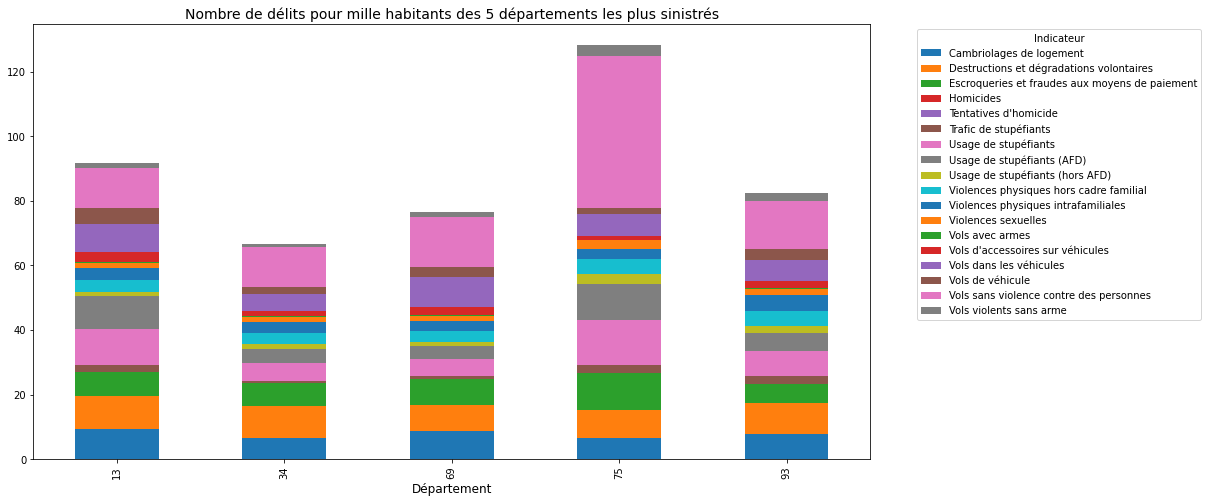

In [19]:
# Tracé du diagramme en bâtons empilés
taux_top5.plot(kind='bar', stacked=True,figsize=(15,8))
plt.title('Nombre de délits pour mille habitants des 5 départements les plus sinistrés',fontsize=14)
plt.xlabel('Département',fontsize=12)
plt.legend(title='Indicateur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

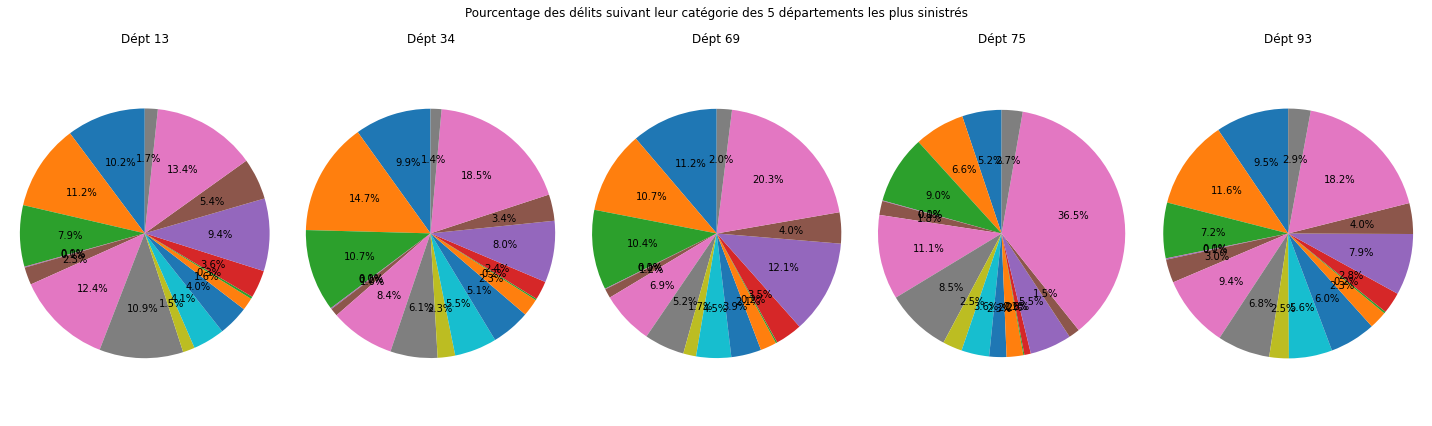

In [20]:
#Tracés des diagrammes circulaires
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize=(20,6))
for ax, dept in zip(axes, taux_top5.index):
    parts = taux_top5.loc[dept]
    ax.pie(parts, labels=None, autopct='%1.1f%%', startangle=90)
    ax.set_title(f"Dépt {dept}")
    ax.axis('equal')
plt.suptitle('Pourcentage des délits suivant leur catégorie des 5 départements les plus sinistrés')
plt.tight_layout() #ajuste la position et l'espacement des graphes de manière optimale
plt.show()

On peut faire quelques remarques à la lumière de ces deux types de diagrammes :
- à Paris(75), qui est le département où l'on recense le plus de crimes, les vols sans violence contre des personnes sont largement plus fréquents que dans les autres départements ; même si cette catégorie demeure la plus représentée dans chacun des départements représentés, une telle différence peut s'expliquer par le fait que Paris est la seule ville considérée comme un département, et qui est de plus très prisée des touristes qui sont les cibles des pickpockets (ce qui augmente le nombre de vols chez les non-habitants, et donc le taux_pour_mille) ;
- le diagramme en bâtons empilés montre que si l'on retire la catégorie des vols sans violence contre des personnes, le département des Bouches-du-Rhône(13) rivalise avec Paris(75) pour la première place ;
- la Seine-saint-denis (93), le Rhône(69) et l'Hérault(34) ont des profils proches, à l'exception des homicides et tentatives d'homicides plus présents dans le Rhône.

####
### II.3 Classement des régions et comparaison des départements au sein de la région où l'on recense le plus de criminalité.

On procède de manière similaire à ce qui a été fait pour le classement des départements, à la différence que, étant donné que le nombre de départements est différent selon les régions, le classement se fera cette fois-ci en comparant les moyennes des taux.

In [21]:
# Regroupement pour chaque région les taux pour mille sur les différents indicateurs en 2024
group_reg2024 = metro2024.groupby('Code_region')
classement_reg = group_reg2024['taux_pour_mille'].mean().sort_values(ascending=False)
# Transformation en dataframe
classement_reg = pd.DataFrame({'Code_region': classement_reg.index,'taux_pour_mille': classement_reg.values})
# Ajout d'une colonne pour le rang
classement_reg['rang'] = classement_reg.index + 1
classement_reg

,Code_region,taux_pour_mille,rang
0,11,3.875786,1
1,93,3.458761,2
2,32,2.913479,3
3,84,2.650915,4
4,76,2.492865,5
5,44,2.412297,6
6,24,2.399687,7
7,28,2.341000,8
8,52,2.327929,9
9,75,2.323381,10


Ainsi, la région la plus concernée par la délinquance est la région Ile-de-France (voir la liste des [codes régions](https://fr.wikipedia.org/wiki/R%C3%A9gion_fran%C3%A7aise)).
On va extraire par la suite les taux pour mille habitants des départements de la région, et comparer leurs profils par type de criminalité. Les méthodes employées sont similaires à ce qui a été fait dans la partie II.2.

In [22]:
# Récupération des données sur 2024 des départements d'Ile-de-France
delits_IDF = metro2024.loc[metro2024['Code_region']==11,:]
# Obtention du tableau des taux pour mille pour chaque catégorie
taux_IDF = delits_IDF.pivot_table(index='Code_departement', columns='indicateur', values='taux_pour_mille')
taux_IDF

indicateur,Cambriolages de logement,Destructions et dégradations volontaires,Escroqueries et fraudes aux moyens de paiement,Homicides,Tentatives d'homicide,Trafic de stupéfiants,Usage de stupéfiants,Usage de stupéfiants (AFD),Usage de stupéfiants (hors AFD),Violences physiques hors cadre familial,Violences physiques intrafamiliales,Violences sexuelles,Vols avec armes,Vols d'accessoires sur véhicules,Vols dans les véhicules,Vols de véhicule,Vols sans violence contre des personnes,Vols violents sans arme
Code_departement,,,,,,,,,,,,,,,,,,
75,6.611763,8.448672,11.485993,0.015139,0.088470,2.351795,14.217216,10.953279,3.263937,4.665268,2.890659,2.796038,0.174102,1.087190,7.017062,1.862606,46.889230,3.516101
77,6.152401,6.973979,6.039663,0.011705,0.035114,0.596943,6.315758,4.465026,1.850731,2.483477,3.790281,1.670340,0.119802,2.405675,3.337926,2.481412,6.757785,0.561141
78,6.425108,6.623705,6.650902,0.008159,0.043514,0.501775,5.029991,3.629372,1.400619,2.312382,3.378484,1.414897,0.080230,1.988743,2.250510,2.101609,6.675379,0.483418
91,6.841805,8.110704,6.252708,0.017364,0.080027,0.846328,3.777898,2.587302,1.190597,3.005558,3.888125,1.553740,0.143445,2.754151,3.361152,3.182222,7.690182,0.814619
92,5.888116,7.937187,8.195164,0.004856,0.054630,0.917183,3.961917,2.831675,1.130242,2.193713,2.916655,1.372437,0.095300,1.229183,3.252936,2.341822,12.958326,0.804888
93,7.789794,9.522960,5.920112,0.024974,0.115952,2.492679,7.705778,5.618636,2.087143,4.617877,4.916975,1.901024,0.195632,2.289316,6.542687,3.284722,14.978668,2.390403
94,6.489295,7.370040,6.933276,0.006340,0.072559,1.482180,5.100981,3.390557,1.710424,2.952384,3.820276,1.559670,0.116940,1.927397,4.044294,2.850237,11.722181,1.010193
95,6.429201,8.142614,6.239156,0.012590,0.075540,1.186612,5.530179,3.950915,1.579264,3.112890,4.028029,1.513953,0.179408,2.654926,4.401009,3.369412,10.214464,0.971794


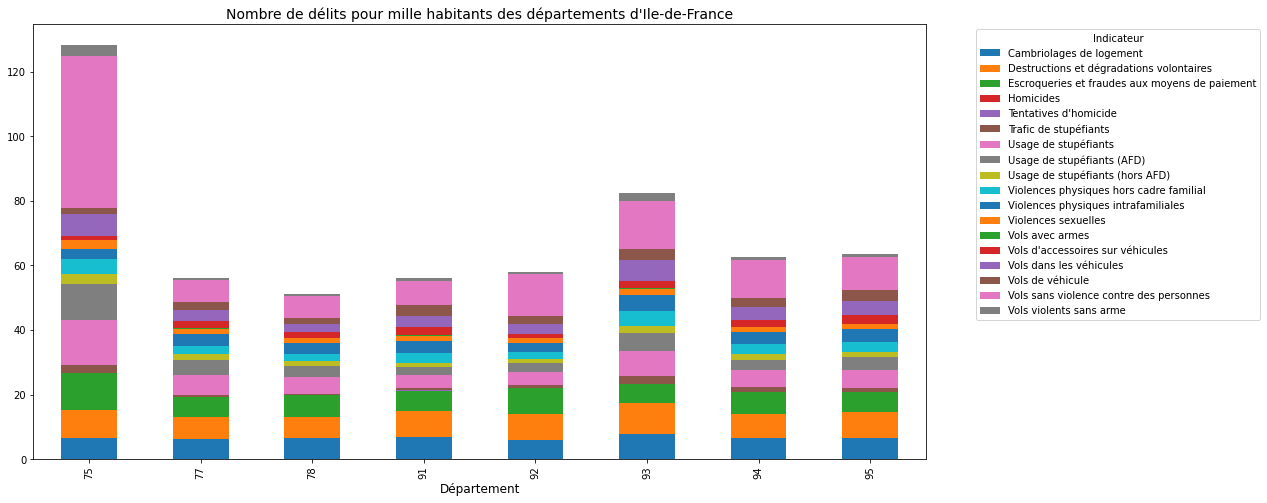

In [23]:
# Tracé du diagramme en bâtons empilés
taux_IDF.plot(kind='bar', stacked=True,figsize=(16,8))
plt.title('Nombre de délits pour mille habitants des départements d\'Ile-de-France',fontsize=14)
plt.xlabel('Département',fontsize=12)
plt.legend(title='Indicateur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

On constate que dans le cas où les départements sont éloignés dans le classement, un diagramme en bâtons empilés est difficilement exploitable pour comparer les profils. La comparaison se fera uniquement sur l'observation des diagrammes circulaires ci-dessous.

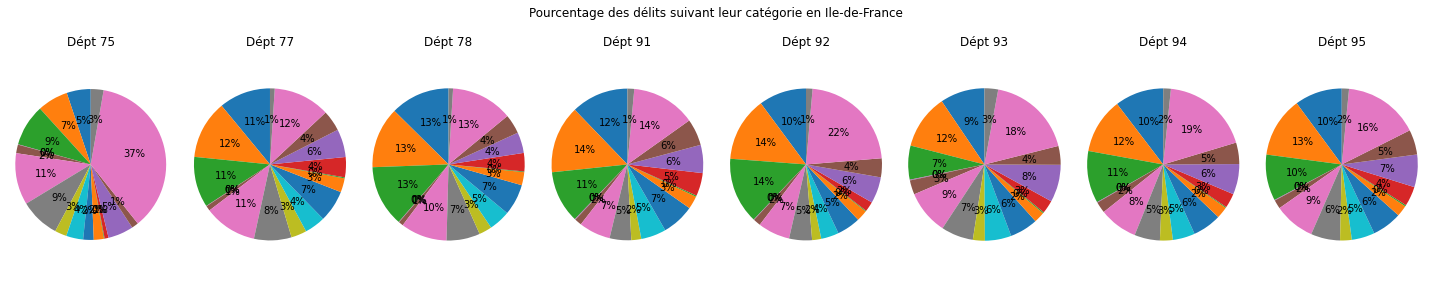

In [24]:
#Tracés des diagrammes circulaires
fig, axes = plt.subplots(nrows = 1, ncols = 8, figsize=(20,4))
for ax, dept in zip(axes, taux_IDF.index):
    parts = taux_IDF.loc[dept]
    ax.pie(parts, labels=None, autopct='%1.0f%%', startangle=90)
    ax.set_title(f"Dépt {dept}")
    ax.axis('equal')
plt.suptitle('Pourcentage des délits suivant leur catégorie en Ile-de-France')
plt.tight_layout()
plt.show()

On peut remarquer ainsi que :
- le profil de Paris(75) est unique dans la région car 37% des faits recensés dans ce département concerne des vols sans violence envers des personnes, 11% concerne l'usage de stupéfiants, et les autres catégories ne dépassent pas les 10% ;
- la Seine-et-Marne(77), les Yvelines(78) et l'Essonne(91) ont des profils similaires (entre 11 et 14% de faits recensés dans chacune des catégories vols sans violence, cambriolages, destructions/dégradations, escroqueries/fraudes aux moyens de paiement) ;
- le département des Hauts-de-Seine(92) a un profil atypique dans la région car il rassemble 60% des faits recensés sur 4 catégories (vols sans violence, cambriolages, destructions/dégradations, escroqueries/fraudes aux moyens de paiement) avec une nette prédominance de vols sans violence ;
- la Seine-Saint-Denis(93), le Val-de-Marne(94) et le Val-d'Oise(95) ont des similitudes sur la répartition des faits recensés (entre 16 et 19% de vols sans violence, entre 9 et 10% de cambriolages, entre 12 et 13% de destruction/dégradations, entre 7 et 11% d'escroqueries/fraudes aux moyens de paiement, et en dessous de 10% pour chacune des catégories restantes).

#### 
### II.4 Evolution des vols sans violence contre des personnes à Paris

Comme remarqué précédemment, c'est le département de Paris qui détient le triste record de criminalité en 2024, avec 37% des faits recensés liés à vols sans violence contre des personnes.
Dans cette partie, l'évolution de cette catégorie sur les 9 dernières années sera observée.

In [25]:
# Selection des lignes correspondant aux vols sans violence contre des personnes en 2024
mask_vols_2024 = (delits_metropole['indicateur'] =='Vols sans violence contre des personnes') & (delits_metropole['annee'] == 2024)
dept_vols_2024 = delits_metropole.loc[mask_vols_2024, :]

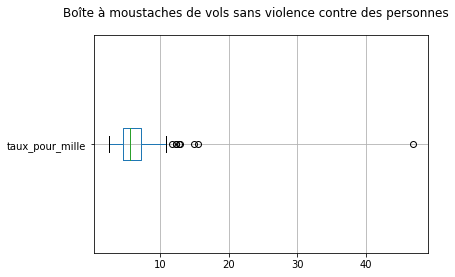

In [26]:
# Construction d'une boîte à moustache pour le taux pour mille habitant
dept_vols_2024.boxplot(column = 'taux_pour_mille', vert = False)
plt.suptitle("Boîte à moustaches de vols sans violence contre des personnes", fontsize=12)
plt.show()

Cette boîte à Moustache montre que Paris (qui recense environ 46,9 vols sans violence contre des personnes pour mille habitants) est largement au dessus des autres départements sur le recensement des délits de cette catégorie.

In [27]:
# Selection des lignes correspondants à Paris et à l'indicateur choisi.
mask_Paris_vols = (delits_metropole['Code_departement'] =='75') & (delits_metropole['indicateur'] =='Vols sans violence contre des personnes')
Paris_vols = delits_metropole.loc[mask_Paris_vols, :]
Paris_vols

,Code_departement,Code_region,annee,indicateur,unite_de_compte,nombre,taux_pour_mille,insee_pop,insee_pop_millesime,insee_log,insee_log_millesime
6438,75,11,2016,Vols sans violence contre des personnes,Victime entendue,131126,59.865947,2190327,2016,1374377,2016
6539,75,11,2017,Vols sans violence contre des personnes,Victime entendue,133233,60.905790,2187526,2017,1382779,2017
6640,75,11,2018,Vols sans violence contre des personnes,Victime entendue,139758,64.238801,2175601,2018,1386846,2018
6741,75,11,2019,Vols sans violence contre des personnes,Victime entendue,162378,74.986735,2165423,2019,1389375,2019
6842,75,11,2020,Vols sans violence contre des personnes,Victime entendue,110863,51.662561,2145906,2020,1393800,2020
6943,75,11,2021,Vols sans violence contre des personnes,Victime entendue,107992,50.626526,2133111,2021,1396753,2021
7044,75,11,2022,Vols sans violence contre des personnes,Victime entendue,122041,57.737953,2113705,2022,1396753,2021
7145,75,11,2023,Vols sans violence contre des personnes,Victime entendue,114001,53.934206,2113705,2022,1396753,2021
7246,75,11,2024,Vols sans violence contre des personnes,Victime entendue,99110,46.889230,2113705,2022,1396753,2021


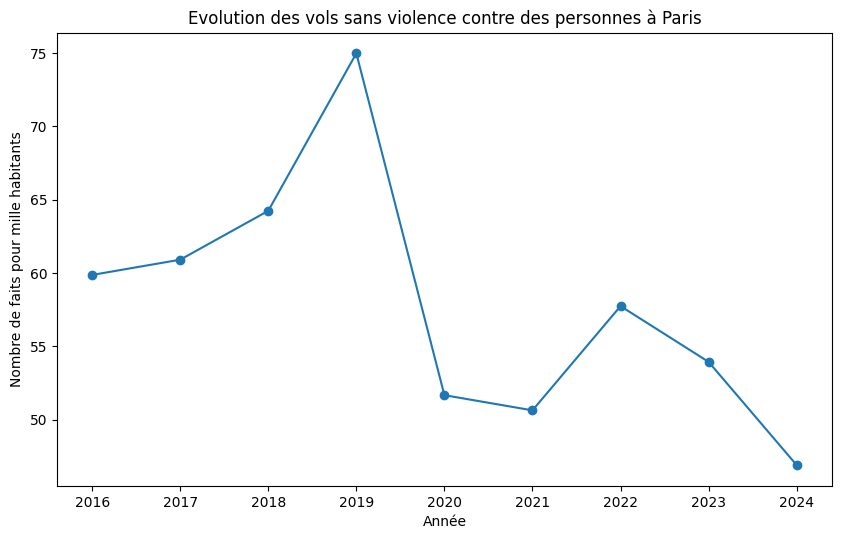

In [28]:
#Tracé d'un graphique
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.plot(Paris_vols['annee'],Paris_vols['taux_pour_mille'], marker='o',)
plt.title('Evolution des vols sans violence contre des personnes à Paris')
plt.xlabel('Année')
plt.ylabel('Nombre de faits pour mille habitants')
plt.show()

Grâce à ce graphique, on peut observer que les vols sans violence contre des personnes à Paris (par exemple le pickpocket) ont augmenté fortement jusqu'en 2019, puis on drastiquement baissé durant la période du COVID-19. Depuis le retour à la normale en 2022, cette catégorie de délits baisse régulièrement, et les chiffres obtenus en 2024, même s'ils sont largement au dessus de la moyenne nationale, n'ont jamais été aussi bas sur ces 9 dernières années.

On peut se demander si cette évolution est de même nature pour la deuxième catégorie la plus présente, qui est l'usage de stupéfiants. Le graphique ci-dessous démontre le contraire : le recensement de l'usage de stupéfiants était plutôt stable avant l'apparition du COVID-19 et n'a cessé d'augmenter fortement depuis 2020.

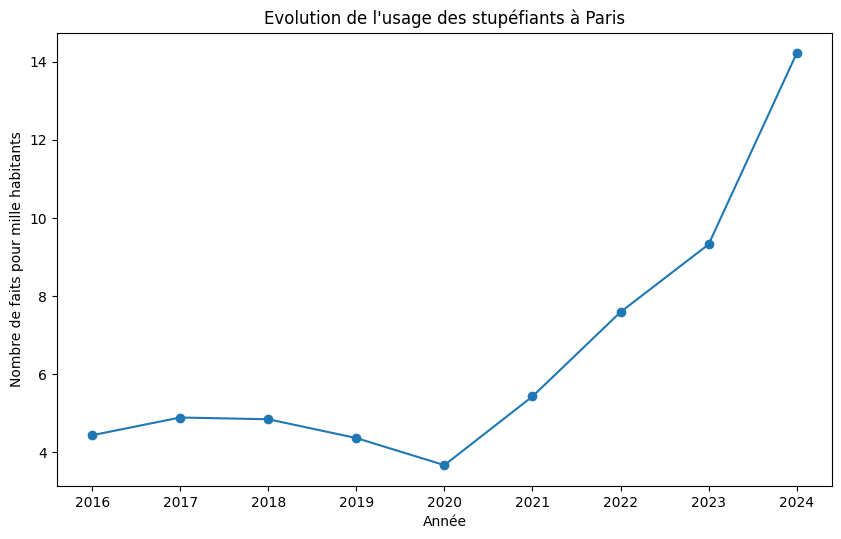

In [29]:
# Selection des lignes correspondants à Paris et à l'indicateur choisi.
mask_Paris_stup = (delits_metropole['Code_departement'] =='75') & (delits_metropole['indicateur'] =='Usage de stupéfiants')
Paris_stup = delits_metropole.loc[mask_Paris_stup, :]
# Tracé du graphique
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.plot(Paris_stup['annee'],Paris_stup['taux_pour_mille'], marker='o',)
plt.title('Evolution de l\'usage des stupéfiants à Paris')
plt.xlabel('Année')
plt.ylabel('Nombre de faits pour mille habitants')
plt.show()

####
## Conclusion

L’analyse des données fournies par la police et la gendarmerie dresse un panorama clair des zones les plus touchées par la délinquance en France métropolitaine en 2024. D’un département à l’autre, les écarts sont conséquents : les moins exposés recensent 2 à 5 fois moins de faits pour 1 000 habitants que les plus concernés.

Chez les cinq départements les plus touchés, la structure des infractions présente des points communs, avec une large prédominance des vols sans violence contre les personnes, mais aussi quelques spécificités locales. En Île-de-France, région la plus concernée, des disparités entre départements existent et témoignent du poids des réalités locales.

À Paris, l’observation des vols sans violence et de l’usage des stupéfiants sur les neuf dernières années confirme l’impact notable de la période COVID-19 sur ces phénomènes.

Cette étude met en avant la diversité des situations selon les territoires, et elle rappelle l’utilité d’indicateurs détaillés pour adapter efficacement les mesures de prévention et de sécurité. Pour approfondir, il serait utile de s’intéresser plus finement à chaque type d’infraction et d’intégrer d’autres facteurs explicatifs, comme la situation économique ou la démographie, pour mieux comprendre les évolutions constatées.